<a href="https://colab.research.google.com/github/cynthiatcelorio/ML_Clustering/blob/main/dani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install clustimage

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# librerias
from glob import glob
import matplotlib.pyplot as plt
from skimage import color
from skimage.color import rgb2gray
from skimage.io import imshow, imread
from clustimage import Clustimage
import numpy as np


import cv2
from natsort import natsorted 
from skimage import io

In [5]:
!git clone "https://github.com/cynthiatcelorio/ML_Clustering_Data.git"

ruta_train = "/content/ML_Clustering_Data/train"
ruta_test = "/content/ML_Clustering_Data/test"

fatal: destination path 'ML_Clustering_Data' already exists and is not an empty directory.


In [3]:
# Creamos un array con las rutas de las difetentes imágenes ordenadas alfabéticamente

train_images = glob('/content/ML_Clustering_Data/train/*')                
train_images = natsorted(train_images)

In [4]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

In [85]:
len(train_images)         # wtf me sobra una

print(train_images[7889])
print(train_img_num[7888])

# Eso de ML_Clustering_Data revisarlo luego, puede dar problemas

/content/ML_Clustering_Data/train/ML_Clustering_Data
8154


### Preprocesamiento de las imágenes (Probablemente no sirva, pero es el "Chulo"

Antes de extraer características de las imágenes, tenemos que llevar a cabo un preprocesamiento para poder comparar las imágenes en lo referente a color y valor.

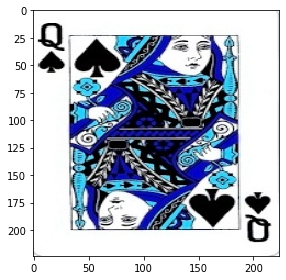

In [89]:
import cv2

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cv2.imread(train_images[i]) 
     
    images_entrenamiento.append(img)

io.imshow(images_entrenamiento[88])

La librería Clustimage cuenta con una función *imread* que premite escalar las imagenes a una dimensión concreta y pasarlas a escala de grises asignando al parámetro *colorscale* el valor 0.

In [ ]:
'''
# Inicializar
cl = Clustimage()

# Cargar dataset
images_entrenamiento = []

for i in range(0, len(train_images)):
    img = cl.imread(train_images[i], dim=(128, 128), colorscale=0, flatten=True)
    images_entrenamiento.append(img)


img = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)

print(img)


# proximo objetivo: plottear como 9 a la vez, mirar por algun lado
plt.figure()
plt.imshow(img.reshape(128,128,3))
plt.axis('off')'''

[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]
[clustimage] >INFO> filepath is set to [/tmp/clustimage]


"\nimg = cl.imread(train_images[1980], dim=(128, 128), colorscale=1, flatten=True)\n\nprint(img)\n\n\n# proximo objetivo: plottear como 9 a la vez, mirar por algun lado\nplt.figure()\nplt.imshow(img.reshape(128,128,3))\nplt.axis('off')"

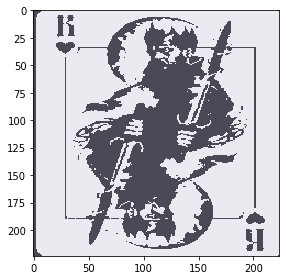

In [84]:
# Hacemos dos clusters con SKMEANS  (?) y así lo separamos mayoritariamente entre el fondo de la carta y el dibujo

img = images_entrenamiento[7]

img2 = img.reshape((-1, 3))
img2 = np.float32(img2)

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

# Clusters
k=2

attempts = 10
ret,label,center=cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
from sklearn.cluster import KMeans

center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv2.imwrite("aaaa.jpg", res2)

io.imshow(res2)

### Preprocesamiento de las imágenes (Este está "mejor hecho") (Da menos problemas)

In [2]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
from imutils import paths
import cv2

imagePaths = list(paths.list_images(ruta_train))
imagePaths = natsorted(imagePaths)

In [23]:
# Creamos un array para guardar los números que corresponden a las imágenes en orden alfabético
import glob, os

train_img_num = []

for file in glob.glob('/content/ML_Clustering_Data/train/*.jpg'):
    file = os.path.basename(file)
    file = file[:-4]
    train_img_num.append(file) 

train_img_num = natsorted(train_img_num)

In [97]:
from google.colab.patches import cv2_imshow
images_entrenamiento = []
cropped = []
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    #gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized = cv2.resize(image, (128, 128))
    image=cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
    se=cv2.getStructuringElement(cv2.MORPH_RECT , (8,8))
    bg=cv2.morphologyEx(image, cv2.MORPH_DILATE, se)
    out_gray=cv2.divide(image, bg, scale=255)
    out_binary=cv2.threshold(out_gray, 0, 255, cv2.THRESH_OTSU )[1] 
    images_entrenamiento.append(out_binary)
    cropped.append(out_binary[0:40, 0:40])


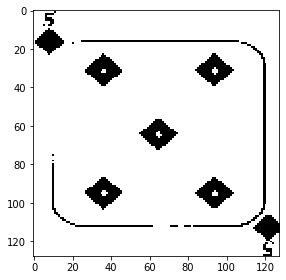

In [112]:
from skimage import io
io.imshow(images_entrenamiento[7744])

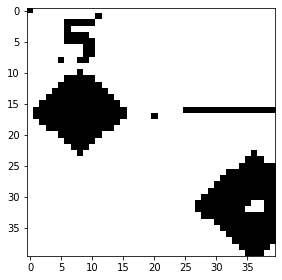

In [113]:
io.imshow(cropped[7744])

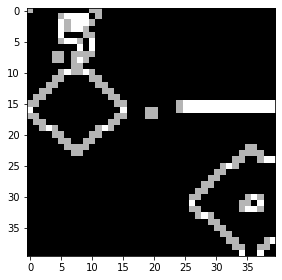

In [131]:
# Algo como se esto se podría hacer

from skimage import filters

io.imshow(filters.roberts(cropped[7744]))

## Otros

Ajustes básicos de imágenes (Escala de grises, rotar y recortar)

https://www.youtube.com/watch?v=uDNqNv2N-pY&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=19

Image segmentation

https://www.youtube.com/watch?v=6CqRnx6Ic48&list=PLZsOBAyNTZwYHBIlu_PUO19M7aHMgwBJr&index=52

Edición de imagen que hemos utilizado

https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python